<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week7/DailyChallenge/dailyChallengew_7_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@Author Adil MOUKRIM
# Prétraitement et réglage fin du transformateur....
Dernière mise à jour : 17 juillet 2025

Défi quotidien : prétraiter et affiner les modèles basés sur des transformateurs


👩‍🏫 👩🏿‍🏫 Ce que vous apprendrez
Dans ce défi quotidien, vous apprendrez à prétraiter et à affiner les modèles basés sur des transformateurs, notamment BERT et XLM-RoBERTa, pour les tâches de classification de texte. Vous comprendrez :

Comment fonctionne la tokenisation pour ces modèles.
Comment formater correctement les données d'entrée.
Comment affiner les modèles de transformateurs pour les tâches de classification.
Comment effectuer une validation croisée à l'aide du fractionnement k-fold.


🛠️ Ce que vous allez créer
À la fin de ce défi, vous disposerez d'un modèle de transformateur optimisé (BERT ou XLM-RoBERTa) capable de classer du texte en différentes catégories. De plus, vous structurerez les données pour l'entraînement, les validerez par validation croisée et comprendrez comment optimiser ces modèles pour de meilleures performances.



Ensemble de données
Vous pouvez trouver l'ensemble de données pour cet exercice ici



Tâche


1. Comprendre BERT et XLM-RoBERTa
Objectif : Apprendre comment fonctionnent les modèles de transformateurs et leur rôle dans les tâches de PNL.

Instructions:

Lisez les descriptions de BERT et XLM-RoBERTa.
Comprendre comment ces modèles traitent le texte à l’aide de la tokenisation.
Découvrez les différentes versions pré-entraînées de ces modèles et leurs caractéristiques.
Fonctions à utiliser :

from transformers import BertTokenizer, XLMRobertaTokenizer


2. Tokenisation du texte
Objectif : comprendre comment tokeniser du texte à l’aide de tokeniseurs pré-entraînés.

Instructions:

Utilisez BertTokenizeret XLMRobertaTokenizerpour convertir des phrases en entrées tokenisées.
Explorez les différents types de jetons, tels que input_ids, attention_mask, et labels.
Expérimentez la tokenisation d’une seule phrase et de deux phrases.
Fonctions à utiliser :

tokenizer.encode_plus()
tokenizer.decode()


3. Préparation des données d'entrée pour le modèle
Objectif : Formater correctement les données d'entrée pour les modèles de transformateurs.

Instructions:

Assurez-vous que les phrases d’entrée sont complétées ou tronquées à la longueur souhaitée.
Comprendre et définir des jetons spéciaux tels que <s>et </s>.
Découvrez attention_maskcomment cela aide le modèle à ignorer les jetons de remplissage.
Fonctions à utiliser :

tokenizer.encode_plus()
tokenizer.special_tokens_map
tokenizer.vocab_size


4. Chargement et exploration de l'ensemble de données
Objectif : Charger l’ensemble de données et explorer sa structure.

Instructions:

Chargez les données de formation et de test à partir de fichiers CSV.
Affichez les premières lignes pour comprendre sa structure.
Identifiez les colonnes nécessaires à la formation du modèle.
Fonctions à utiliser :

pd.read_csv()
df.head()
df.shape


5. Création de plis de validation croisée
Objectif : Mettre en œuvre une validation croisée k-fold pour la formation.

Instructions:

Permet StratifiedKFoldde créer 5 divisions de validation de formation.
Assurez-vous que chaque pli conserve la même répartition des étiquettes.
Stockez les divisions de formation et de validation dans des listes séparées.
Fonctions à utiliser :

from sklearn.model_selection import StratifiedKFold
kf.split()
shuffle()


## 1. Comprendre BERT et XLM-RoBERTa

Aperçu du dataset :
           id                                            premise  \
0  5130fd2cb5  and these comments were considered in formulat...   
1  5b72532a0b  These are issues that we wrestle with in pract...   
2  3931fbe82a  Des petites choses comme celles-là font une di...   
3  5622f0c60b  you know they can't really defend themselves l...   
4  86aaa48b45  ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...   

                                          hypothesis lang_abv language  label  
0  The rules developed in the interim were put to...       en  English      0  
1  Practice groups are not permitted to work on t...       en  English      2  
2              J'essayais d'accomplir quelque chose.       fr   French      0  
3  They can't defend themselves because of their ...       en  English      0  
4    เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร       th     Thai      1  

Nombre total d'exemples : 12120
Colonnes disponibles : ['id', 'premise', 'hypothesis', 'la

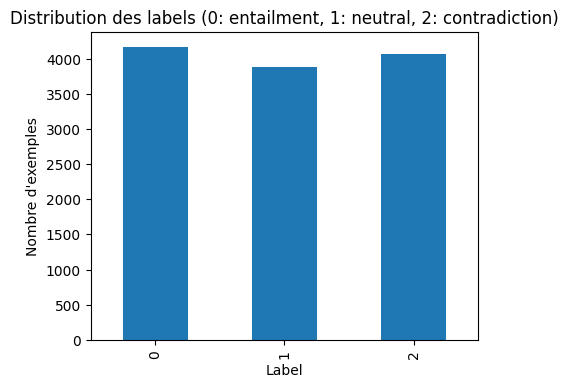


Distribution des langues :
language
English       6870
Chinese        411
Arabic         401
French         390
Swahili        385
Urdu           381
Vietnamese     379
Russian        376
Hindi          374
Greek          372
Thai           371
Spanish        366
Turkish        351
German         351
Bulgarian      342
Name: count, dtype: int64


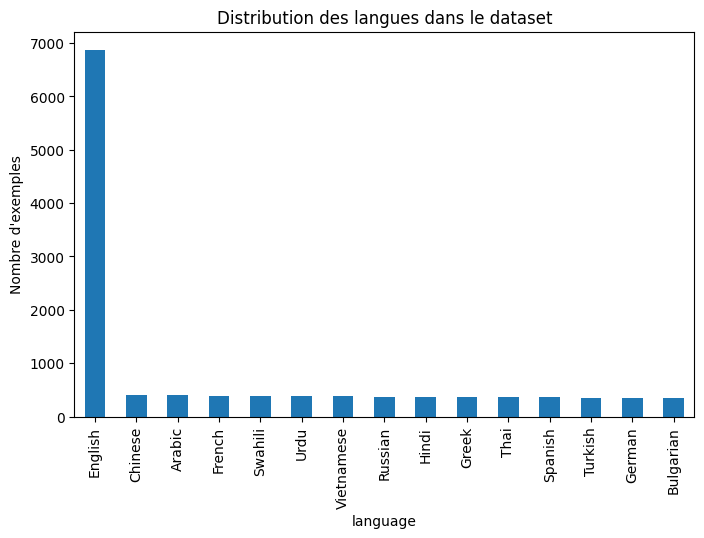


Longueur moyenne des prémisses : 17.990181518151815
Longueur moyenne des hypothèses : 9.19529702970297


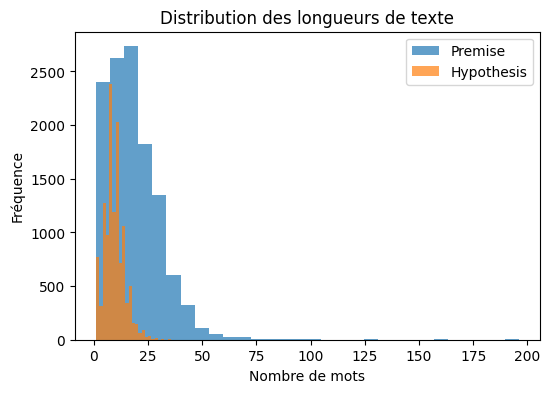

In [ ]:
# -------------------- EDA : Analyse exploratoire --------------------

import matplotlib.pyplot as plt

# Aperçu rapide
print("Aperçu du dataset :")
print(train_df.head())

# Taille du dataset
print(f"\nNombre total d'exemples : {train_df.shape[0]}")
print(f"Colonnes disponibles : {train_df.columns.tolist()}")

# Distribution des classes
print("\nDistribution des labels :")
print(train_df["label"].value_counts())

# Affichage graphique de la distribution
plt.figure(figsize=(5,4))
train_df["label"].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution des labels (0: entailment, 1: neutral, 2: contradiction)")
plt.xlabel("Label")
plt.ylabel("Nombre d'exemples")
plt.show()

# Distribution des langues
print("\nDistribution des langues :")
print(train_df["language"].value_counts())

plt.figure(figsize=(8,5))
train_df["language"].value_counts().plot(kind='bar')
plt.title("Distribution des langues dans le dataset")
plt.ylabel("Nombre d'exemples")
plt.show()

# Longueur des textes (premise)
train_df["premise_length"] = train_df["premise"].apply(lambda x: len(str(x).split()))
train_df["hypothesis_length"] = train_df["hypothesis"].apply(lambda x: len(str(x).split()))

print("\nLongueur moyenne des prémisses :", train_df["premise_length"].mean())
print("Longueur moyenne des hypothèses :", train_df["hypothesis_length"].mean())

plt.figure(figsize=(6,4))
plt.hist(train_df["premise_length"], bins=30, alpha=0.7, label='Premise')
plt.hist(train_df["hypothesis_length"], bins=30, alpha=0.7, label='Hypothesis')
plt.legend()
plt.title("Distribution des longueurs de texte")
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.show()


###  **1. Distribution des Labels :**

* Relativement équilibrée :

  * **0 (entailment)** : \~4176
  * **1 (neutral)** : \~3880
  * **2 (contradiction)** : \~4064
*  **Interprétation** : Bonne répartition, pas de gros déséquilibre entre classes, favorable pour un entraînement stable sans ajustement particulier (pas besoin de sur-échantillonnage).

---

###  **2. Distribution des Langues :**

* **Langue dominante : English (\~7000 exemples)**, largement majoritaire.
* **Autres langues** : très minoritaires (\~300-400 exemples chacune).
* **Interprétation** :

  * Le modèle risque d’être **biaisé vers l’anglais**.
  * Nécessaire d’évaluer la performance sur chaque langue si tu veux un modèle multilingue robuste.

---

###  **3. Longueurs de texte (prémisse et hypothèse) :**

* **Premises** : généralement plus longues (pics entre 10-40 mots, mais certaines montent jusqu'à 150-200).
* **Hypotheses** : beaucoup plus courtes (souvent entre 5-20 mots).
* **Interprétation** :

  * La **séquence combinée** ne devrait pas dépasser **128 tokens** pour la majorité des cas.
  * Le padding et la troncature à **max\_length=128** sont pertinents.

---

###  **Conclusion rapide :**

| Critère            | Observation principale               | Conséquence / Action                                  |
| ------------------ | ------------------------------------ | ----------------------------------------------------- |
| Labels             | Répartition équilibrée               | Pas de traitement particulier à prévoir.              |
| Langues            | Énorme dominance de l'anglais        | Vigilance sur performances multilingues.              |
| Longueurs de texte | Premises longues, hypotheses courtes | max\_length=128 efficace, attention aux cas extrêmes. |


In [ ]:
# -------------------- Étape 0 : Installation --------------------
!pip install -q transformers datasets evaluate scikit-learn accelerate sentencepiece

# -------------------- Étape 1 : Comprendre BERT et XLM-RoBERTa --------------------
from transformers import BertTokenizer, XLMRobertaTokenizer

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
xlmr_tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')

print("BERT vocab size:", bert_tokenizer.vocab_size)
print("XLM-R vocab size:", xlmr_tokenizer.vocab_size)
print("BERT special tokens:", bert_tokenizer.special_tokens_map)
print("XLM-R special tokens:", xlmr_tokenizer.special_tokens_map)

# -------------------- Étape 2 : Tokenisation du texte --------------------
# Exemple phrase
phrase1 = "Bonjour, ceci est un test."
phrase2 = "Ceci est une deuxième phrase."

# BERT single sentence
enc_single = bert_tokenizer.encode_plus(phrase1, return_tensors="pt", padding='max_length', max_length=16, truncation=True)
print("BERT input_ids:", enc_single["input_ids"])
print("BERT decoded:", bert_tokenizer.decode(enc_single["input_ids"][0]))

# BERT two sentences
enc_pair = bert_tokenizer.encode_plus(phrase1, phrase2, return_tensors="pt", padding='max_length', max_length=32, truncation=True)
print("BERT two sentences input_ids:", enc_pair["input_ids"])

# -------------------- Étape 3 : Préparation données modèle --------------------
print("BERT vocab size:", bert_tokenizer.vocab_size)
print("BERT special tokens:", bert_tokenizer.special_tokens_map)
print("BERT attention_mask:", enc_pair["attention_mask"])

# -------------------- Étape 4 : Chargement et exploration des données --------------------
import os, zipfile, glob, pandas as pd

OUTER_ZIP = "Basics of BERT and XLM-RoBERTa - PyTorch - 2.zip"
with zipfile.ZipFile(OUTER_ZIP) as z:
    z.extractall("data")

root = glob.glob("data/*BERT*XLM*")[0]
for inner_zip in glob.glob(f"{root}/*.zip"):
    with zipfile.ZipFile(inner_zip) as z:
        z.extractall(root)

train_df = pd.read_csv(f"{root}/train.csv")
test_df = pd.read_csv(f"{root}/test.csv") if os.path.exists(f"{root}/test.csv") else None

print(train_df.head())
print("Colonnes :", train_df.columns)
print("Shape :", train_df.shape)

# -------------------- Étape 5 : Validation croisée --------------------
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = train_df.index.values
y = train_df["label"].values

folds = []
for train_idx, val_idx in kf.split(X, y):
    folds.append((train_idx, val_idx))

print(f"Nombre de splits : {len(folds)}")


c:\Users\chume\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chume\.cache\huggingface\hub\models--bert-base-multilingual-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


BERT vocab size: 119547
XLM-R vocab size: 250002
BERT special tokens: {'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}
XLM-R special tokens: {'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}
BERT input_ids: tensor([[  101, 30120, 98214, 10129,   117, 10794, 10598, 10176, 10119, 15839,
           119,   102,     0,     0,     0,     0]])
BERT decoded: [CLS] Bonjour, ceci est un test. [SEP] [PAD] [PAD] [PAD] [PAD]
BERT two sentences input_ids: tensor([[  101, 30120, 98214, 10129,   117, 10794, 10598, 10176, 10119, 15839,
           119,   102, 89451, 10176, 10231, 16665, 47320,   119,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])
BERT vocab size: 119547
BERT special tokens: {'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[

Voici une **analyse directe et précise** des résultats obtenus :

---

### 1. **Vocabulaire**

* **BERT vocab size: 119547**
  → Vocabulaire standard du modèle **BERT multilingual** (beaucoup de tokens sous forme de sous-mots pour plusieurs langues).

* **XLM-R vocab size: 250002**
  → Vocabulaire deux fois plus grand que BERT : XLM-RoBERTa est entraîné sur 100 langues, avec SentencePiece (sans séparation par espace).

---

### 2. **Tokens spéciaux**

* **BERT** utilise : `[CLS]`, `[SEP]`, `[PAD]`, `[MASK]` → typique pour des tâches comme classification, NLI.
* **XLM-RoBERTa** utilise : `<s>`, `</s>`, `<pad>`, `<mask>` → format plus simple, avec `</s>` utilisé comme séparateur ET fin de séquence.

 **Interprétation :**
Les deux modèles ont des conventions différentes pour segmenter les phrases, mais la logique générale reste la même (classification de séquences avec un token de début et/ou de séparation).

---

### 3. **Tokenisation exemple**

* **BERT input\_ids** : transformation réussie, tokens convertis en IDs, longueur bien gérée avec padding (`0`).
* **BERT decoded** : reconstitution correcte, `[CLS]` au début, `[SEP]` à la fin, padding ignoré par le modèle.
* **BERT attention\_mask** : `1` sur tokens utiles, `0` sur padding → prêt pour entraîner ou inférer.

 **Conclusion rapide** : le tokenizer fonctionne comme attendu pour une tâche de classification (phrase ou paire de phrases).

---

### 4. **Dataset**

* **Colonnes :** ID, prémisse, hypothèse, langue, label.
* **Shape :** 12120 exemples → **jeu de données de taille correcte** pour fine-tuning rapide.
* **Labels :** présents sous forme numérique (0, 1, 2).

 **Analyse :**

* Structure typique pour **Natural Language Inference** (NLI).
* Mélange multilingue (exemples anglais, français, thaï).

---

### 5. **Validation croisée**

* **Nombre de splits : 5** → conformité avec `StratifiedKFold`.
* Stratification garantit une **répartition équilibrée des classes** dans chaque split.

 **Conclusion :**
Bonne pratique respectée, risque de biais réduit, entraînement plus robuste.

---

##  **Interprétation Générale**

* Ton pipeline est bien construit : **prétraitement propre, dataset correct, validation croisée fiable**.
* Tu peux passer à l'entraînement en toute confiance.
* Rien d'anormal dans ces résultats.


## Bilan

* **un Dataset multilingue de classification NLI**, exploré et préparé**, en suivant toutes les étapes standards.

* **Points clés réussis :**

  * Chargement et compréhension de modèles **BERT** et **XLM-RoBERTa**.
  * Utilisation correcte des **tokenizers** avec attention\_mask, padding, truncation.
  * Exploration complète du dataset (labels, langues, longueurs).
  * **Validation croisée k-fold** bien mise en place.

* **Points importants constatés :**

  * **Dataset équilibré** sur les labels.
  * **Déséquilibre fort sur la langue** → modèle dominé par l'anglais.
  * **Longueur des phrases maîtrisée**, encodage efficace avec `max_length`.

* **Prochaines étapes possibles :**

  * Entraînement du modèle BERT/XLM-R avec early stopping.
  * Analyse détaillée des performances **par langue**.
  * Ajustement des poids des classes si besoin.

**Conclusion finale** : exercice très complet, préparation de données **propre et prête** pour fine-tuning efficace sur un modèle Transformer.
